In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic/train.csv') # Comma Separated Values - Valores Separados Por Vírgula
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaoConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd.crosstab(data['Sobreviveu'], data['Classe'] )

Classe,1,2,3
Sobreviveu,,,
0,80,97,372
1,136,87,119


In [18]:
pd.crosstab(data['Sobreviveu'], data['Classe'], values = data['Idade'], aggfunc = "mean", margins=True)

Classe,1,2,3,All
Sobreviveu,,,,
0,43.695312,33.544444,26.555556,30.626179
1,35.368197,25.901566,20.646118,28.343690
All,38.233441,29.877630,25.140620,29.699118


In [95]:
pd.crosstab(data['Sobreviveu'], data['Classe'], values = data['Idade'], aggfunc = lambda  x :  x . mean () * 2 )

Classe,1,2,3
Sobreviveu,,,
0,87.390625,67.088889,53.111111
1,70.736393,51.803133,41.292235


In [14]:
pd.crosstab(data['Sobreviveu'], data['Classe'], normalize=True)

Classe,1,2,3
Sobreviveu,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


In [17]:
pd.crosstab(data['Sobreviveu'], [data['Classe'], data['Sexo']])

Classe         1            2            3       
Sexo       homem mulher homem mulher homem mulher
Sobreviveu                                       
0             77      3    91      6   300     72
1             45     91    17     70    47     72

In [2]:
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True).style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [20]:
pd.crosstab(data['Sobreviveu'], data['Sexo'], margins=True).style.background_gradient(cmap='Blues')

Sexo,homem,mulher,All
Sobreviveu,,,
0,468,81,549
1,109,233,342
All,577,314,891


<AxesSubplot:xlabel='Sexo', ylabel='Sobreviveu'>

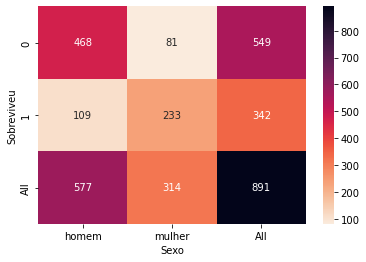

In [23]:
cross = pd.crosstab(data['Sobreviveu'], data['Sexo'], margins=True)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')

In [80]:
data.isna()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
data['Embarque'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarque, dtype: int64

In [61]:
data.loc[data['Embarque'].isnull()]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
61,62,1,1,"Icard, Miss. Amelie",mulher,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",mulher,62.0,0,0,113572,80.0,B28,NaN


In [79]:
data[data['Embarque'].notnull()].head()
# ~ negação da condição
data[~data['Embarque'].isnull()].head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data[data['Embarque'].notnull()].head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.describe(include='O')

,Nome,Sexo,Bilhete,Cabine,Embarque
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",homem,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
data.isnull().sum()

2

In [53]:
print(data['Embarque'].unique())
print(data['Embarque'].mode())

['S' 'C' 'Q' nan]
0    S
dtype: object


In [47]:
data['Embarque'].mode()[0]

'S'

In [17]:
data.isna().sum()

IdPassageiro      0
Sobreviveu        0
Classe            0
Nome              0
Sexo              0
Idade           177
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Cabine          687
Embarque          2
dtype: int64

In [54]:
data['Embarque'] = data['Embarque'].fillna('S')

In [77]:
moda = data['Embarque'].mode()[0]
data.loc[:,'Embarque'] = data['Embarque'].fillna(media)

In [78]:
data['Embarque'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [82]:
data.isna().sum()

IdPassageiro    0
Sobreviveu      0
Classe          0
Nome            0
Sexo            0
Idade           0
IrmaoConjuge    0
PaisFilhos      0
Bilhete         0
Tarifa          0
Embarque        0
dtype: int64

In [84]:
data['Embarque'].at[61] = 'Q'
data.iloc[61]

IdPassageiro                      81
Sobreviveu                         0
Classe                             3
Nome            Waelens, Mr. Achille
Sexo                           homem
Idade                           22.0
IrmaoConjuge                       0
PaisFilhos                         0
Bilhete                       345767
Tarifa                           9.0
Embarque                           S
Name: 80, dtype: object

In [97]:
data.iat[61, 11] = 'S'
data.iloc[61]

IdPassageiro                     62
Sobreviveu                        1
Classe                            1
Nome            Icard, Miss. Amelie
Sexo                         mulher
Idade                          38.0
IrmaoConjuge                      0
PaisFilhos                        0
Bilhete                      113572
Tarifa                         80.0
Cabine                          B28
Embarque                          S
Name: 61, dtype: object

In [96]:

data.iloc[61]

IdPassageiro                     62
Sobreviveu                        1
Classe                            1
Nome            Icard, Miss. Amelie
Sexo                         mulher
Idade                          38.0
IrmaoConjuge                      0
PaisFilhos                        0
Bilhete                      113572
Tarifa                         80.0
Cabine                          B28
Embarque                          S
Name: 61, dtype: object

In [92]:
data.columns

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade',
       'IrmaoConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine',
       'Embarque'],
      dtype='object')

In [75]:
data.iloc[[61,829]]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
61,62,1,1,"Icard, Miss. Amelie",mulher,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",mulher,62.0,0,0,113572,80.0,B28,NaN


In [76]:
data.dropna(axis=1, thresh=600, inplace=True)
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,S


In [79]:
data.dropna(axis=0, subset=['Idade'], inplace=True)

In [81]:
data.shape

(714, 11)

In [107]:
data[data['Bilhete'].isin(['PC 17599'])]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C


In [118]:
data[data['Bilhete'].str.contains('PC | A/5')]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
30,31,0,1,"Uruchurtu, Don. Manuel E",homem,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",mulher,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",homem,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",mulher,49.0,1,0,PC 17572,76.7292,D33,C
64,65,0,1,"Stewart, Mr. Albert A",homem,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",homem,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",homem,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",homem,24.0,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",homem,24.0,0,0,PC 17593,79.2000,B86,C


In [121]:
data[data['Bilhete'].str.contains('A/5|PC')]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
12,13,0,3,"Saundercock, Mr. William Henry",homem,20.0,0,0,A/5. 2151,8.0500,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",homem,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",mulher,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
789,790,0,1,"Guggenheim, Mr. Benjamin",homem,46.0,0,0,PC 17593,79.2000,B82 B84,C
793,794,0,1,"Hoyt, Mr. William Fisher",homem,NaN,0,0,PC 17600,30.6958,NaN,C
835,836,1,1,"Compton, Miss. Sara Rebecca",mulher,39.0,1,1,PC 17756,83.1583,E49,C
853,854,1,1,"Lines, Miss. Mary Conover",mulher,16.0,0,1,PC 17592,39.4000,D28,S


In [113]:
data[data['Bilhete'].str.len() > 17]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",homem,20.0,0,0,SOTON/O.Q. 3101307,7.05,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",homem,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S
363,364,0,3,"Asim, Mr. Adola",homem,35.0,0,0,SOTON/O.Q. 3101310,7.05,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",homem,38.0,0,0,SOTON/O.Q. 3101306,7.05,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",homem,NaN,0,0,SOTON/O.Q. 3101305,7.05,NaN,S
784,785,0,3,"Ali, Mr. William",homem,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S


In [132]:
data[data['Cabine'].str.contains('D33', na=False)]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",mulher,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1,1,"Harper, Mr. Henry Sleeper",homem,48.0,1,0,PC 17572,76.7292,D33,C


In [ ]:
data[data['Bilhete'].str.contains('PC')]